In [1]:
from stanford_cs229.modeling.softmax import SoftmaxRegression
from stanford_cs229.modeling.k_means import KMeans
from stanford_cs229.modeling.perceptron import train_perceptron, predict_perceptron
from stanford_cs229.utils.util import load_our_data, plot, preprocess_rolling_avg, cmap
from stanford_cs229.utils.csv_plotter_classifier import format_data

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib notebook

# Number of class for learning
K = 5
plt_counter = 0

# Load data and preprocess for K-means
raw_data = load_our_data('stanford_cs229/data/ydeskx_overhand_weight_4-60Hz_extended2.csv')
raw_data = raw_data / raw_data.max()
X_tr = preprocess_rolling_avg(raw_data)
X_tr = X_tr / X_tr.max()

shuffler = np.random.permutation(raw_data.shape[0])
X_tr = X_tr[shuffler][:6000]
raw_data = raw_data[shuffler][:6000]


# Run K-means to get labels
print("** Running K-means to label raw data **")
k_means = KMeans(verbose=True)
Y_tr_k_means = k_means.assign(X_tr, K, random=False)

** Running K-means to label raw data **
Iteration: 1, Loss: 216.6010951506959
Iteration: 2, Loss: 110.15099856958479
Iteration: 3, Loss: 91.01784057059088
Iteration: 4, Loss: 88.89151334370688
Iteration: 5, Loss: 88.46147544372879
Iteration: 6, Loss: 88.32429178620585
Iteration: 7, Loss: 88.28503027102155
Iteration: 8, Loss: 88.26698200655224
Iteration: 9, Loss: 88.25511209856772
Iteration: 10, Loss: 88.2460925500421
Iteration: 11, Loss: 88.24320409649965
Iteration: 12, Loss: 88.24251152229829
Iteration: 13, Loss: 88.24190543654849
Iteration: 14, Loss: 88.24148481242446
Iteration: 15, Loss: 88.23966715379679
Iteration: 16, Loss: 88.23870851861652
Iteration: 17, Loss: 88.23793021354946
Iteration: 18, Loss: 88.23551316162234
Iteration: 19, Loss: 88.2353384210414
Iteration: 20, Loss: 88.2353384210414
Time: 0:00:08.185636


<IPython.core.display.Javascript object>


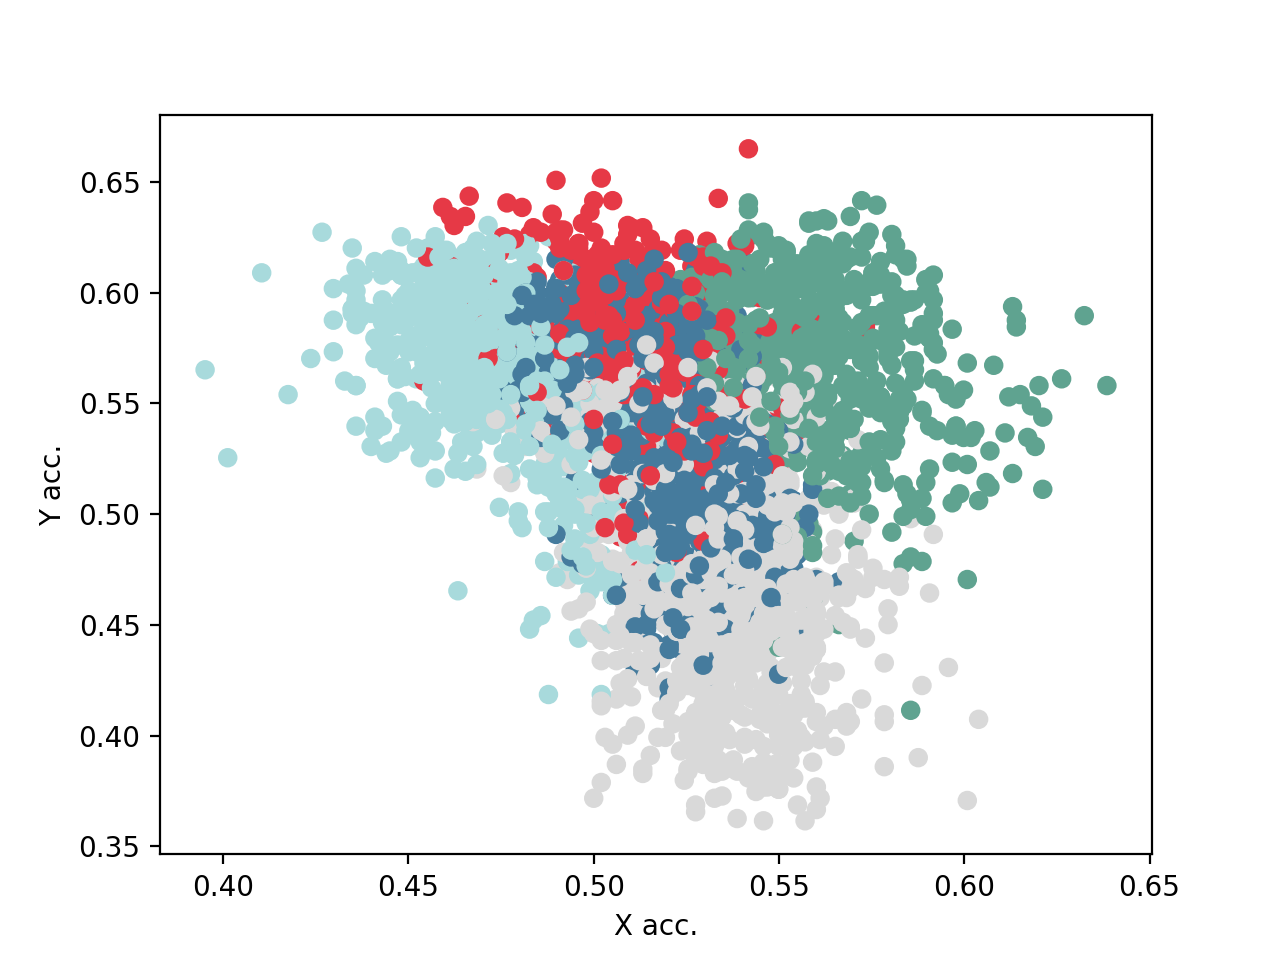

<IPython.core.display.Javascript object>


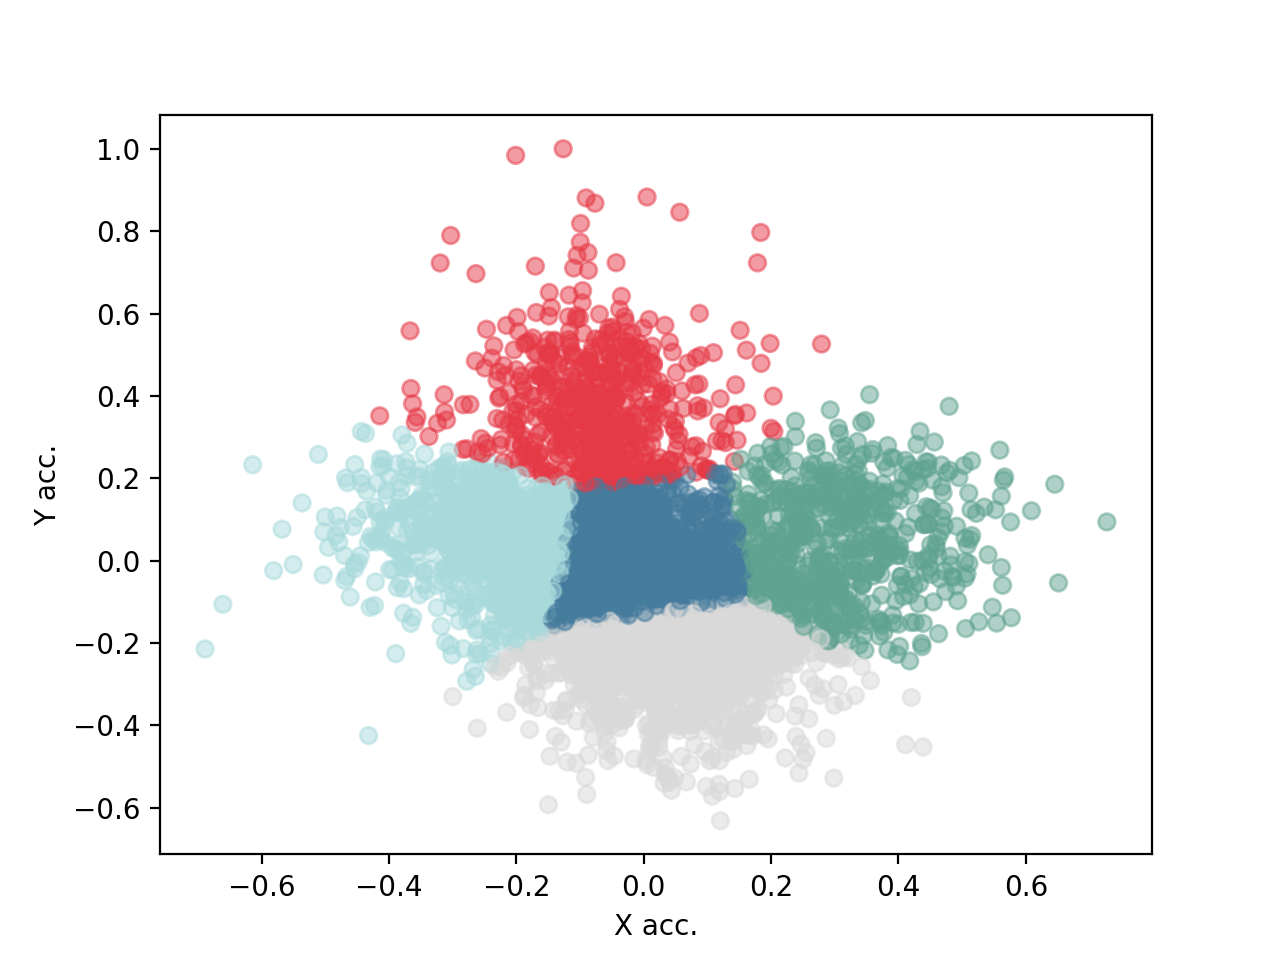

Text(0, 0.5, 'Y acc.')

In [22]:
# Plot raw data
fig1 = plt.figure(plt_counter)
plt_counter += 1
ax1 = plt.axes()
ax1.scatter(raw_data[:,0], raw_data[:,1], c=cmap(Y_tr_k_means))
ax1.set_xlabel('X acc.')
ax1.set_ylabel('Y acc.')

# Plot preprocessed data
fig2 = plt.figure(plt_counter)
plt_counter += 1
ax2 = plt.axes()
ax2.scatter(X_tr[:,0], X_tr[:,1], c=cmap(Y_tr_k_means), alpha=0.5)
ax2.set_xlabel('X acc.')
ax2.set_ylabel('Y acc.')

In [3]:
# Save plots
save_new_plots = False

if save_new_plots:
    plt.figure(fig1.number)
    plt.savefig('manual_labeling.png', dpi=300)
    plt.figure(fig2.number)
    plt.savefig('k_means_labeling.png', dpi=300)

In [25]:
# Train softmax classifier and make predictions
softmax = SoftmaxRegression(lr=0.01, max_iter=1000, verbose=False)

print('** Training softmax classifier **')
softmax.train(X_tr, Y_tr_k_means, K)

print('** Making predictions **')
Y_pred = softmax.predict(X_tr)

accuracy = np.sum(Y_pred == Y_tr_k_means) / Y_tr_k_means.size
print(accuracy)

** Training softmax classifier **
Training Time: 0:00:00.688505
** Making predictions **
0.5123333333333333


<IPython.core.display.Javascript object>


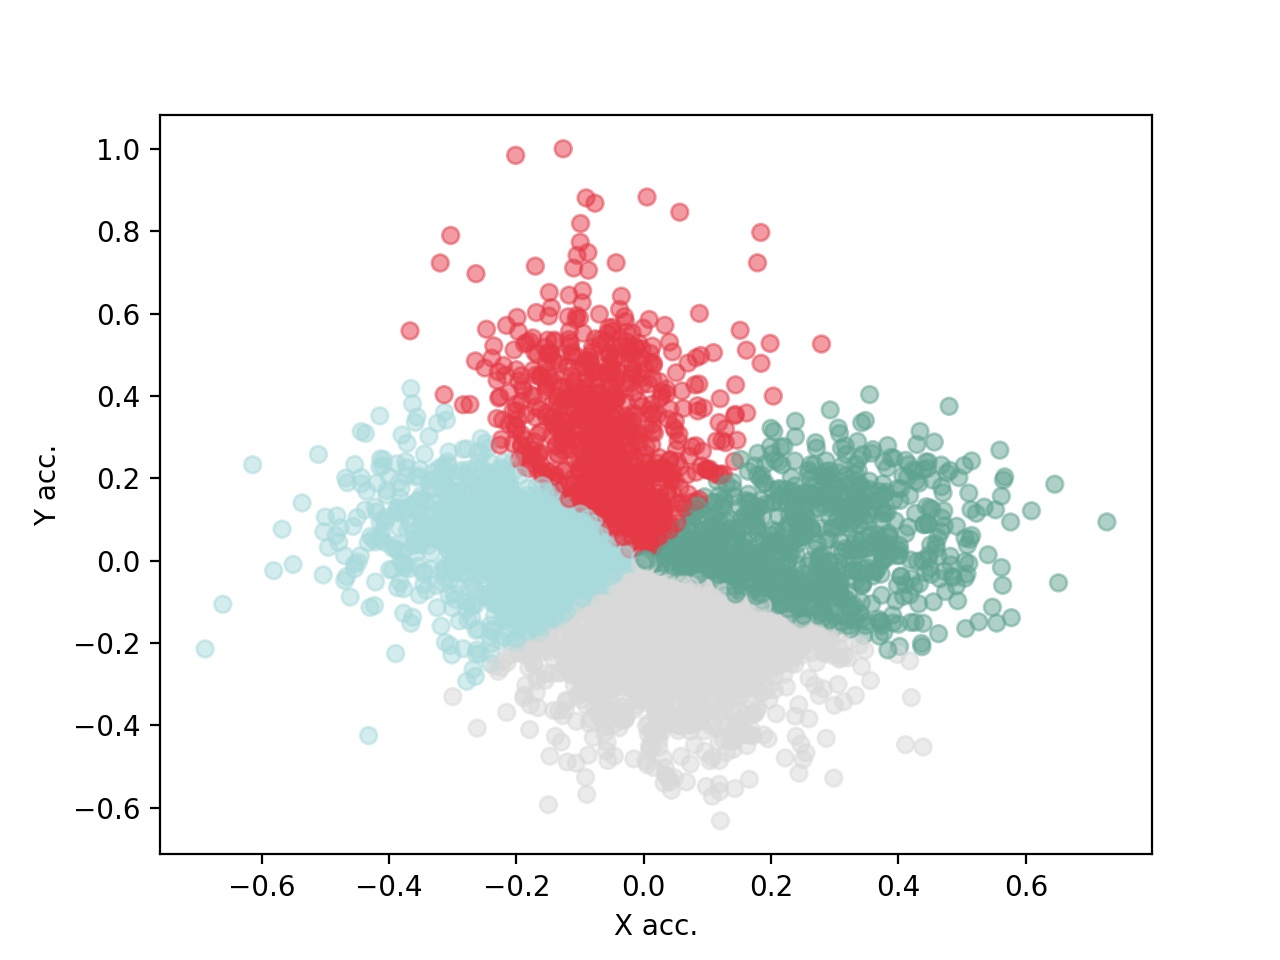

Text(0, 0.5, 'Y acc.')

In [27]:
# Plot data with predicted labels
fig3 = plt.figure(plt_counter)
plt_counter += 1
ax3 = plt.axes()
ax3.scatter(X_tr[:,0], X_tr[:,1], c=cmap(Y_pred), alpha=0.5)
ax3.set_xlabel('X acc.')
ax3.set_ylabel('Y acc.')

** Training softmax classifier **
Training Time: 0:00:02.047342
** Making predictions **
0.6894012167787384


<IPython.core.display.Javascript object>


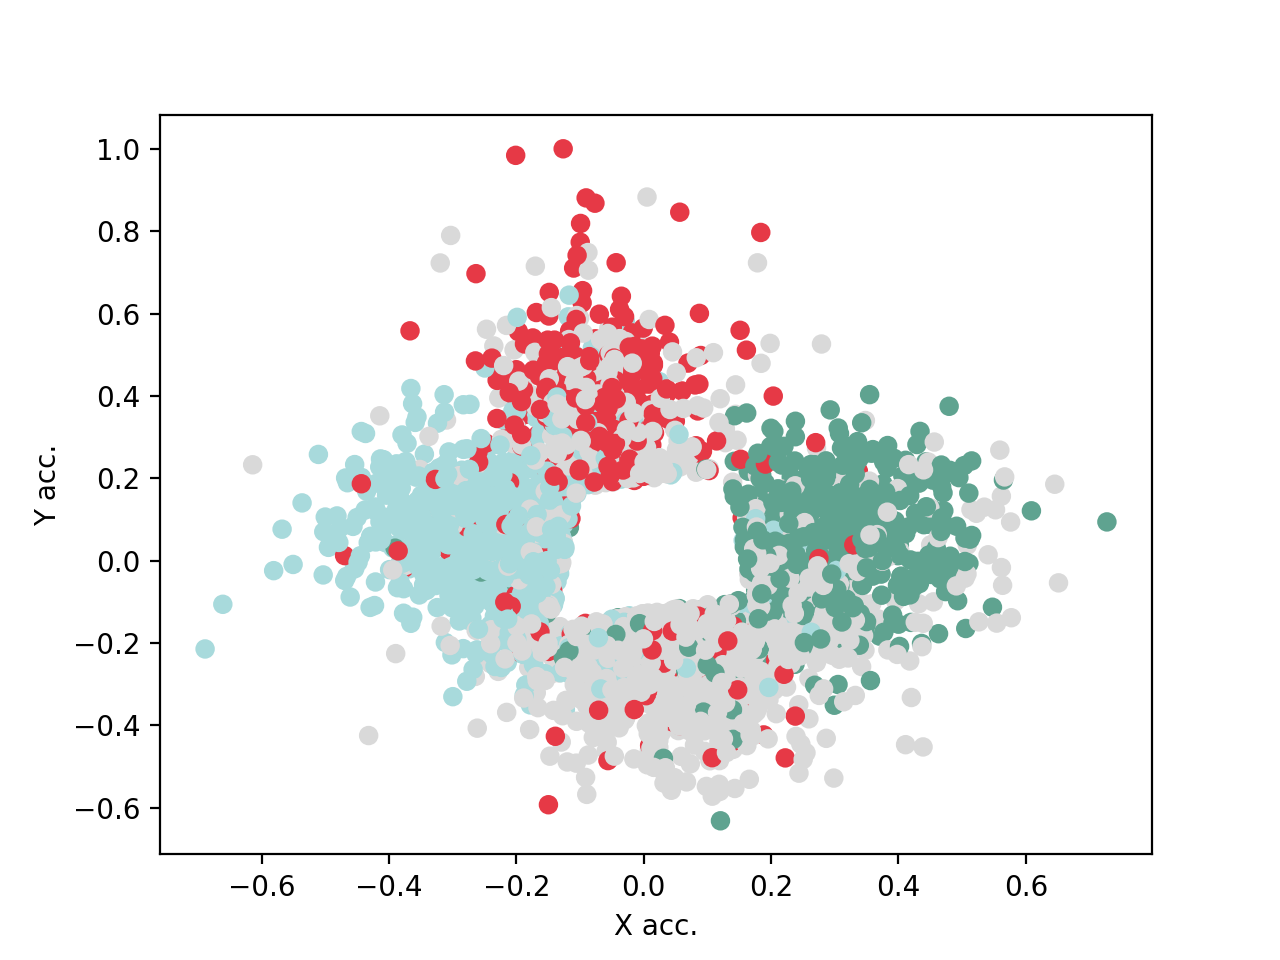

Text(0, 0.5, 'Y acc.')

In [6]:
from stanford_cs229.modeling.perceptron import train_perceptron, predict_perceptron

def get_neutral_class():
    for c in np.unique(Y_tr_k_means):
        if c not in np.unique(Y_pred):
            return c

neutral_class = get_neutral_class()
Y_tr_perceptron = np.where(Y_tr_k_means==neutral_class, 0, 1)

NUM_DATA = 6000

# Train softmax classifier and make predictions
softmax_2 = SoftmaxRegression(lr=0.001, max_iter=5000, verbose=False)

for i in range(1):
    shuffler = np.random.permutation(raw_data.shape[0])
    Y_pred = Y_pred[shuffler]
    X_tr = X_tr[shuffler]
    raw_data = raw_data[shuffler]
    Y_tr_perceptron = Y_tr_perceptron[shuffler]
    nonzero_indices = np.nonzero(Y_tr_perceptron[:NUM_DATA])
    Y_tr_k_means = Y_tr_k_means[shuffler]

    softmax_tr_y = Y_tr_k_means[:NUM_DATA][nonzero_indices]-1
    softmax_tr_x = raw_data[:NUM_DATA, 2:]
    print('** Training softmax classifier **')
    softmax_2.train(softmax_tr_x[nonzero_indices], softmax_tr_y, K-1)
    
print('** Making predictions **')
Y_pred_2 = softmax_2.predict(softmax_tr_x) + 1

accuracy_2 = np.sum(Y_pred_2[nonzero_indices] == Y_tr_k_means[:NUM_DATA][nonzero_indices]) / Y_tr_k_means[:NUM_DATA][nonzero_indices].size
print(accuracy_2)
    
# Plot data with predicted labels
fig4 = plt.figure(plt_counter)
plt_counter += 1
ax4 = plt.axes()
ax4.scatter(X_tr[:NUM_DATA,0][nonzero_indices], X_tr[:NUM_DATA,1][nonzero_indices], c=cmap(Y_pred_2[nonzero_indices]))
ax4.set_xlabel('X acc.')
ax4.set_ylabel('Y acc.')

** Training perceptron **
Completed 0 iterations
Completed 1000 iterations
Completed 2000 iterations
Completed 3000 iterations
Completed 4000 iterations
Completed 5000 iterations
** Predicting perceptron **


<IPython.core.display.Javascript object>


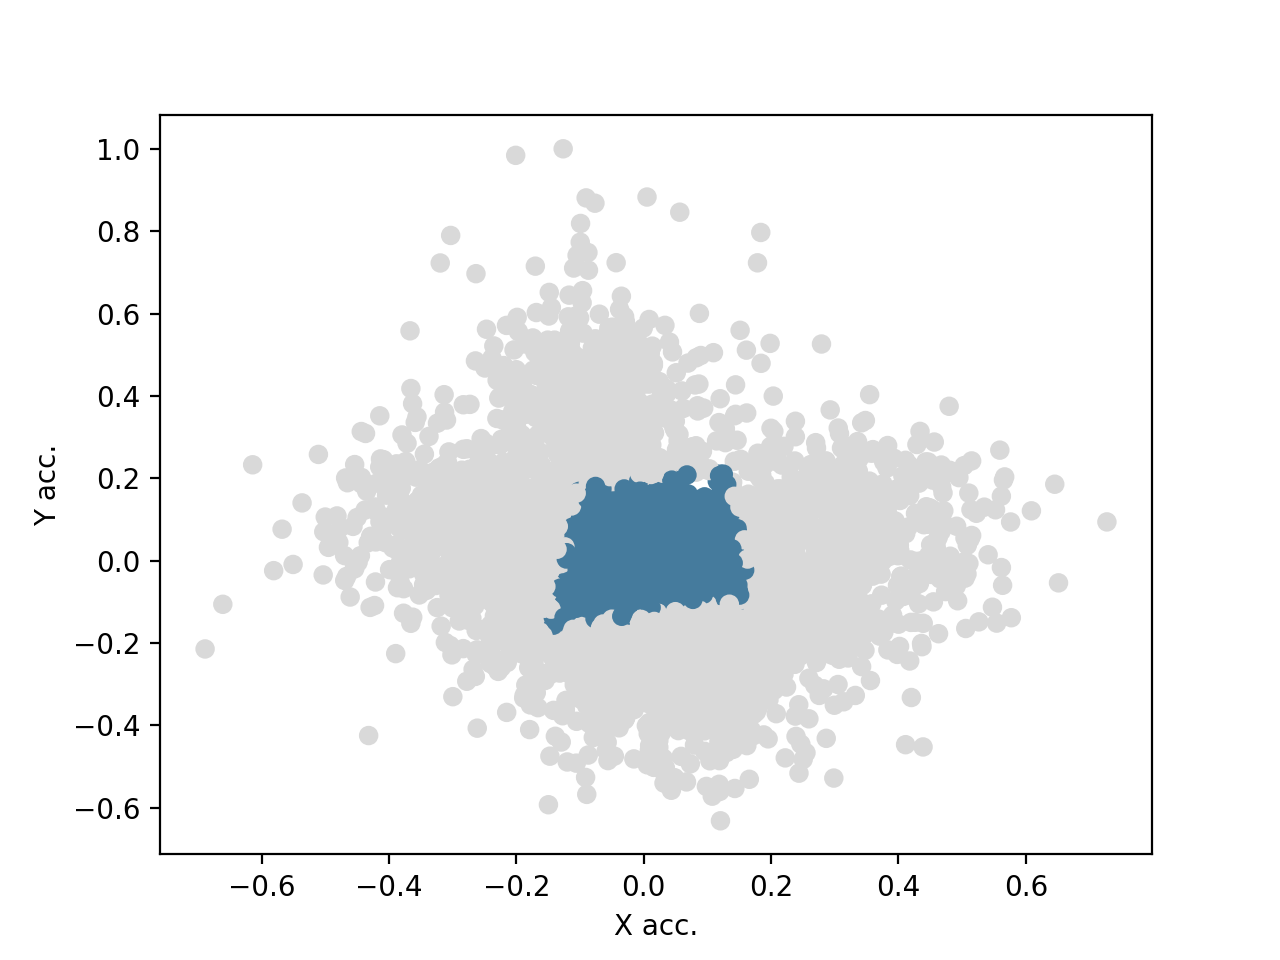

<IPython.core.display.Javascript object>


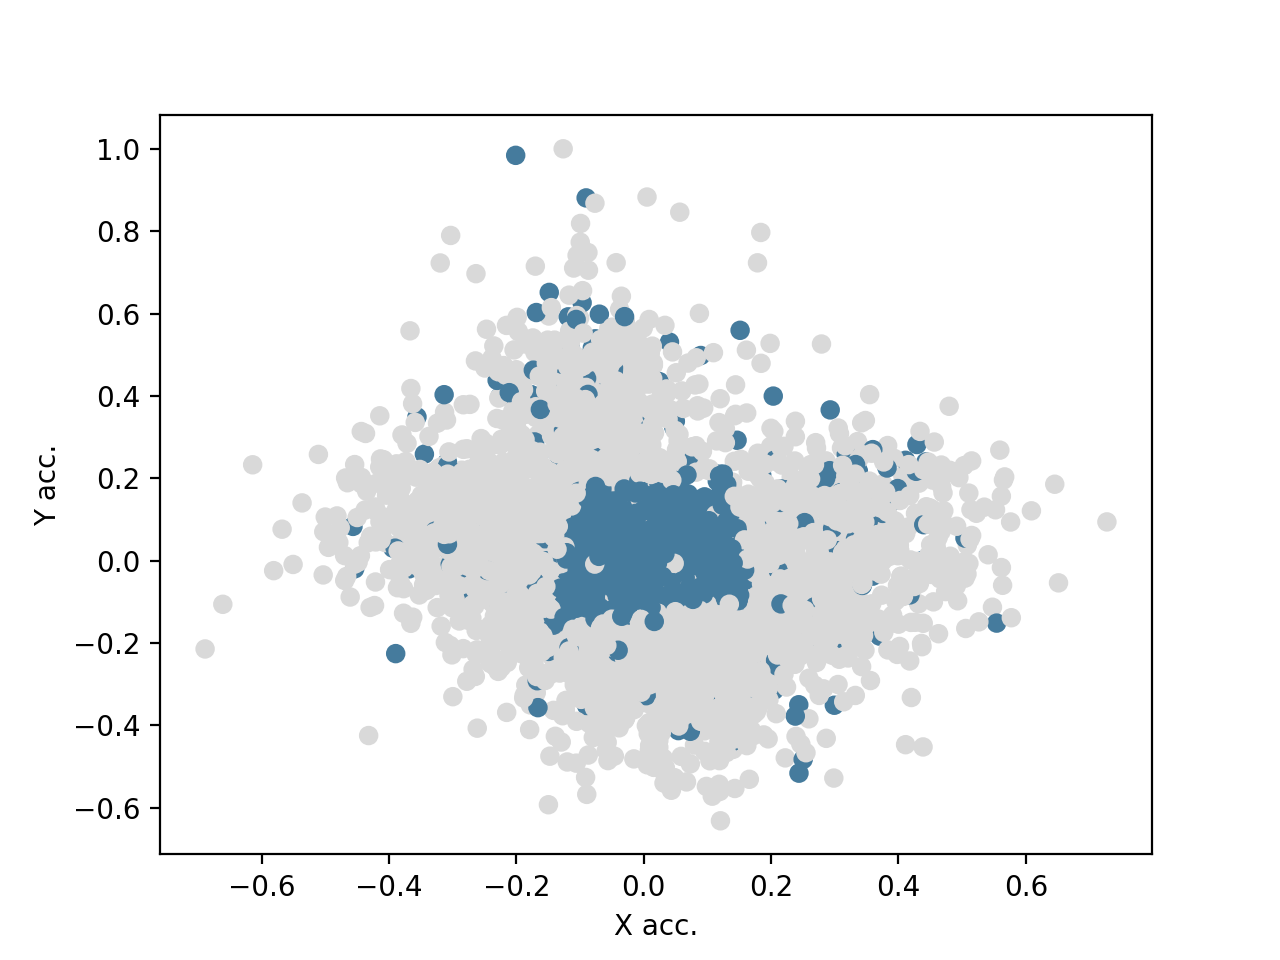

Text(0, 0.5, 'Y acc.')

In [7]:
print('** Training perceptron **')
radius = 0.004
state = train_perceptron(raw_data[:NUM_DATA, 2:], Y_tr_perceptron[:NUM_DATA], radius=radius)
  
print('** Predicting perceptron **')
predictions = np.array([predict_perceptron(state, raw_data[i, 2:], radius=radius) for i in range(NUM_DATA)])

# Plot data with predicted labels
fig5 = plt.figure(plt_counter)
plt_counter += 1
ax5 = plt.axes()
ax5.scatter(X_tr[:,0], X_tr[:,1], c=cmap(Y_tr_perceptron))
ax5.set_xlabel('X acc.')
ax5.set_ylabel('Y acc.')

# Plot data with predicted labels
fig6 = plt.figure(plt_counter)
plt_counter += 1
ax6 = plt.axes()
ax6.scatter(X_tr[:NUM_DATA,0], X_tr[:NUM_DATA,1], c=cmap(predictions))
ax6.set_xlabel('X acc.')
ax6.set_ylabel('Y acc.')

In [11]:
import tensorflow as tf

class VanillaModel(tf.keras.Model):
    def __init__(self):
        super(VanillaModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(128, activation='relu')
        self.d2 = tf.keras.layers.Dense(128, activation='relu')
        self.d3 = tf.keras.layers.Dense(5)

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        return x
        
  
model = VanillaModel()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(x, labels):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)
  
@tf.function
def test_step(x, labels):
    predictions = model(x)
    print(predictions.shape)
    test_loss = loss_object(labels, predictions)
    test_accuracy(labels, predictions)
  
EPOCHS = 1000

for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    shuffler = np.random.permutation(raw_data.shape[0])
    X_tr = X_tr[shuffler]
    raw_data = raw_data[shuffler]
    Y_tr_k_means = Y_tr_k_means[shuffler]

    train_step(raw_data[:, 2:], Y_tr_k_means)
    test_step(raw_data[:, 2:], Y_tr_k_means)
  
    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
    )


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(6000, 5)
Epoch 1, Loss: 1.606587290763855, Accuracy: 18.766666412353516, Test Loss: 0.0, Test Accuracy: 27.016666412353516
Epoch 2, Loss: 1.5972236394882202, Accuracy: 27.016666412353516, Test Loss: 0.0, Test Accuracy: 46.650001525878906
Epoch 3, Loss: 1.5884720087051392, Accuracy: 46.650001525878906, Test Loss: 0.0, Test Accuracy: 49.900001525878906
Epoch 4, Loss: 1.5802847146987915, Accuracy: 49.900001525878906, Test Loss: 0.0, Test Accuracy: 50.56666564941406
Epoch 5, Loss: 1.5723811388015747, Accur

Epoch 70, Loss: 0.9071082472801208, Accuracy: 61.53333282470703, Test Loss: 0.0, Test Accuracy: 61.75
Epoch 71, Loss: 0.9031276702880859, Accuracy: 61.75, Test Loss: 0.0, Test Accuracy: 61.91666793823242
Epoch 72, Loss: 0.8993102312088013, Accuracy: 61.91666793823242, Test Loss: 0.0, Test Accuracy: 62.03333282470703
Epoch 73, Loss: 0.8956385850906372, Accuracy: 62.03333282470703, Test Loss: 0.0, Test Accuracy: 62.266666412353516
Epoch 74, Loss: 0.8920961618423462, Accuracy: 62.266666412353516, Test Loss: 0.0, Test Accuracy: 62.5
Epoch 75, Loss: 0.8886713981628418, Accuracy: 62.5, Test Loss: 0.0, Test Accuracy: 62.783329010009766
Epoch 76, Loss: 0.8853592276573181, Accuracy: 62.783329010009766, Test Loss: 0.0, Test Accuracy: 62.91666793823242
Epoch 77, Loss: 0.8821500539779663, Accuracy: 62.91666793823242, Test Loss: 0.0, Test Accuracy: 63.20000457763672
Epoch 78, Loss: 0.8790468573570251, Accuracy: 63.20000457763672, Test Loss: 0.0, Test Accuracy: 63.46666717529297
Epoch 79, Loss: 0.87

Epoch 144, Loss: 0.7922492027282715, Accuracy: 68.1500015258789, Test Loss: 0.0, Test Accuracy: 68.23333740234375
Epoch 145, Loss: 0.7915968298912048, Accuracy: 68.23333740234375, Test Loss: 0.0, Test Accuracy: 68.31666564941406
Epoch 146, Loss: 0.7909530997276306, Accuracy: 68.31666564941406, Test Loss: 0.0, Test Accuracy: 68.41666412353516
Epoch 147, Loss: 0.7903159260749817, Accuracy: 68.41666412353516, Test Loss: 0.0, Test Accuracy: 68.43333435058594
Epoch 148, Loss: 0.7896845936775208, Accuracy: 68.43333435058594, Test Loss: 0.0, Test Accuracy: 68.5
Epoch 149, Loss: 0.7890592217445374, Accuracy: 68.5, Test Loss: 0.0, Test Accuracy: 68.55000305175781
Epoch 150, Loss: 0.7884396314620972, Accuracy: 68.55000305175781, Test Loss: 0.0, Test Accuracy: 68.63333892822266
Epoch 151, Loss: 0.7878248691558838, Accuracy: 68.63333892822266, Test Loss: 0.0, Test Accuracy: 68.69999694824219
Epoch 152, Loss: 0.7872146964073181, Accuracy: 68.69999694824219, Test Loss: 0.0, Test Accuracy: 68.7666625

Epoch 218, Loss: 0.7540008425712585, Accuracy: 70.28333282470703, Test Loss: 0.0, Test Accuracy: 70.3499984741211
Epoch 219, Loss: 0.7535761594772339, Accuracy: 70.3499984741211, Test Loss: 0.0, Test Accuracy: 70.36666870117188
Epoch 220, Loss: 0.7531542181968689, Accuracy: 70.36666870117188, Test Loss: 0.0, Test Accuracy: 70.38333129882812
Epoch 221, Loss: 0.752734363079071, Accuracy: 70.38333129882812, Test Loss: 0.0, Test Accuracy: 70.36666870117188
Epoch 222, Loss: 0.7523148059844971, Accuracy: 70.36666870117188, Test Loss: 0.0, Test Accuracy: 70.43333435058594
Epoch 223, Loss: 0.7518940567970276, Accuracy: 70.43333435058594, Test Loss: 0.0, Test Accuracy: 70.45000457763672
Epoch 224, Loss: 0.7514763474464417, Accuracy: 70.45000457763672, Test Loss: 0.0, Test Accuracy: 70.5
Epoch 225, Loss: 0.7510620951652527, Accuracy: 70.5, Test Loss: 0.0, Test Accuracy: 70.53333282470703
Epoch 226, Loss: 0.7506524920463562, Accuracy: 70.53333282470703, Test Loss: 0.0, Test Accuracy: 70.583328247

Epoch 293, Loss: 0.7269042730331421, Accuracy: 71.55000305175781, Test Loss: 0.0, Test Accuracy: 71.5999984741211
Epoch 294, Loss: 0.7265936732292175, Accuracy: 71.5999984741211, Test Loss: 0.0, Test Accuracy: 71.5999984741211
Epoch 295, Loss: 0.7262811660766602, Accuracy: 71.5999984741211, Test Loss: 0.0, Test Accuracy: 71.61666870117188
Epoch 296, Loss: 0.7259688973426819, Accuracy: 71.61666870117188, Test Loss: 0.0, Test Accuracy: 71.6500015258789
Epoch 297, Loss: 0.7256581783294678, Accuracy: 71.6500015258789, Test Loss: 0.0, Test Accuracy: 71.61666870117188
Epoch 298, Loss: 0.7253479957580566, Accuracy: 71.61666870117188, Test Loss: 0.0, Test Accuracy: 71.68333435058594
Epoch 299, Loss: 0.7250401973724365, Accuracy: 71.68333435058594, Test Loss: 0.0, Test Accuracy: 71.71666717529297
Epoch 300, Loss: 0.7247365117073059, Accuracy: 71.71666717529297, Test Loss: 0.0, Test Accuracy: 71.66666412353516
Epoch 301, Loss: 0.7244331240653992, Accuracy: 71.66666412353516, Test Loss: 0.0, Test

Epoch 382, Loss: 0.7011998891830444, Accuracy: 72.61666870117188, Test Loss: 0.0, Test Accuracy: 72.51667022705078
Epoch 383, Loss: 0.7009317874908447, Accuracy: 72.51667022705078, Test Loss: 0.0, Test Accuracy: 72.58333587646484
Epoch 384, Loss: 0.700660228729248, Accuracy: 72.58333587646484, Test Loss: 0.0, Test Accuracy: 72.53333282470703
Epoch 385, Loss: 0.7003848552703857, Accuracy: 72.53333282470703, Test Loss: 0.0, Test Accuracy: 72.63333129882812
Epoch 386, Loss: 0.7001082301139832, Accuracy: 72.63333129882812, Test Loss: 0.0, Test Accuracy: 72.54999542236328
Epoch 387, Loss: 0.6998354196548462, Accuracy: 72.54999542236328, Test Loss: 0.0, Test Accuracy: 72.5999984741211
Epoch 388, Loss: 0.6995640993118286, Accuracy: 72.5999984741211, Test Loss: 0.0, Test Accuracy: 72.56666564941406
Epoch 389, Loss: 0.6992908716201782, Accuracy: 72.56666564941406, Test Loss: 0.0, Test Accuracy: 72.64999389648438
Epoch 390, Loss: 0.6990189552307129, Accuracy: 72.64999389648438, Test Loss: 0.0, T

Epoch 457, Loss: 0.6817182898521423, Accuracy: 73.1500015258789, Test Loss: 0.0, Test Accuracy: 73.25
Epoch 458, Loss: 0.6815128326416016, Accuracy: 73.25, Test Loss: 0.0, Test Accuracy: 73.21666717529297
Epoch 459, Loss: 0.681310772895813, Accuracy: 73.21666717529297, Test Loss: 0.0, Test Accuracy: 73.28333282470703
Epoch 460, Loss: 0.6810742616653442, Accuracy: 73.28333282470703, Test Loss: 0.0, Test Accuracy: 73.21666717529297
Epoch 461, Loss: 0.6808006763458252, Accuracy: 73.21666717529297, Test Loss: 0.0, Test Accuracy: 73.28333282470703
Epoch 462, Loss: 0.6805103421211243, Accuracy: 73.28333282470703, Test Loss: 0.0, Test Accuracy: 73.23333740234375
Epoch 463, Loss: 0.6802535057067871, Accuracy: 73.23333740234375, Test Loss: 0.0, Test Accuracy: 73.29999542236328
Epoch 464, Loss: 0.6800451278686523, Accuracy: 73.29999542236328, Test Loss: 0.0, Test Accuracy: 73.36666870117188
Epoch 465, Loss: 0.679853618144989, Accuracy: 73.36666870117188, Test Loss: 0.0, Test Accuracy: 73.3166656

Epoch 536, Loss: 0.6654531955718994, Accuracy: 73.78333282470703, Test Loss: 0.0, Test Accuracy: 73.79999542236328
Epoch 537, Loss: 0.665255606174469, Accuracy: 73.79999542236328, Test Loss: 0.0, Test Accuracy: 73.76667022705078
Epoch 538, Loss: 0.6650568246841431, Accuracy: 73.76667022705078, Test Loss: 0.0, Test Accuracy: 73.76667022705078
Epoch 539, Loss: 0.6648639440536499, Accuracy: 73.76667022705078, Test Loss: 0.0, Test Accuracy: 73.83333587646484
Epoch 540, Loss: 0.6646758913993835, Accuracy: 73.83333587646484, Test Loss: 0.0, Test Accuracy: 73.83333587646484
Epoch 541, Loss: 0.6644943952560425, Accuracy: 73.83333587646484, Test Loss: 0.0, Test Accuracy: 73.8499984741211
Epoch 542, Loss: 0.6643170714378357, Accuracy: 73.8499984741211, Test Loss: 0.0, Test Accuracy: 73.86666870117188
Epoch 543, Loss: 0.664139986038208, Accuracy: 73.86666870117188, Test Loss: 0.0, Test Accuracy: 73.88333129882812
Epoch 544, Loss: 0.6639631986618042, Accuracy: 73.88333129882812, Test Loss: 0.0, Te

Epoch 622, Loss: 0.6494988799095154, Accuracy: 74.33333587646484, Test Loss: 0.0, Test Accuracy: 74.31666564941406
Epoch 623, Loss: 0.649263322353363, Accuracy: 74.31666564941406, Test Loss: 0.0, Test Accuracy: 74.33333587646484
Epoch 624, Loss: 0.6490477919578552, Accuracy: 74.33333587646484, Test Loss: 0.0, Test Accuracy: 74.36666870117188
Epoch 625, Loss: 0.6488603353500366, Accuracy: 74.36666870117188, Test Loss: 0.0, Test Accuracy: 74.3499984741211
Epoch 626, Loss: 0.6486936807632446, Accuracy: 74.3499984741211, Test Loss: 0.0, Test Accuracy: 74.43333435058594
Epoch 627, Loss: 0.6485379934310913, Accuracy: 74.43333435058594, Test Loss: 0.0, Test Accuracy: 74.3499984741211
Epoch 628, Loss: 0.6483770608901978, Accuracy: 74.3499984741211, Test Loss: 0.0, Test Accuracy: 74.43333435058594
Epoch 629, Loss: 0.648206889629364, Accuracy: 74.43333435058594, Test Loss: 0.0, Test Accuracy: 74.31666564941406
Epoch 630, Loss: 0.6480262279510498, Accuracy: 74.31666564941406, Test Loss: 0.0, Test

Epoch 708, Loss: 0.6332414746284485, Accuracy: 75.0, Test Loss: 0.0, Test Accuracy: 75.01666259765625
Epoch 709, Loss: 0.6330777406692505, Accuracy: 75.01666259765625, Test Loss: 0.0, Test Accuracy: 74.93333435058594
Epoch 710, Loss: 0.6329267024993896, Accuracy: 74.93333435058594, Test Loss: 0.0, Test Accuracy: 74.94999694824219
Epoch 711, Loss: 0.6327782273292542, Accuracy: 74.94999694824219, Test Loss: 0.0, Test Accuracy: 74.98333740234375
Epoch 712, Loss: 0.6326184272766113, Accuracy: 74.98333740234375, Test Loss: 0.0, Test Accuracy: 74.94999694824219
Epoch 713, Loss: 0.6324383020401001, Accuracy: 74.94999694824219, Test Loss: 0.0, Test Accuracy: 75.0
Epoch 714, Loss: 0.6322251558303833, Accuracy: 75.0, Test Loss: 0.0, Test Accuracy: 74.98333740234375
Epoch 715, Loss: 0.6319953203201294, Accuracy: 74.98333740234375, Test Loss: 0.0, Test Accuracy: 74.96666717529297
Epoch 716, Loss: 0.63177090883255, Accuracy: 74.96666717529297, Test Loss: 0.0, Test Accuracy: 75.08333587646484
Epoch 

Epoch 788, Loss: 0.6185263395309448, Accuracy: 75.55000305175781, Test Loss: 0.0, Test Accuracy: 75.53333282470703
Epoch 789, Loss: 0.6183707118034363, Accuracy: 75.53333282470703, Test Loss: 0.0, Test Accuracy: 75.48333740234375
Epoch 790, Loss: 0.6182118058204651, Accuracy: 75.48333740234375, Test Loss: 0.0, Test Accuracy: 75.51666259765625
Epoch 791, Loss: 0.6180459260940552, Accuracy: 75.51666259765625, Test Loss: 0.0, Test Accuracy: 75.51666259765625
Epoch 792, Loss: 0.6178667545318604, Accuracy: 75.51666259765625, Test Loss: 0.0, Test Accuracy: 75.55000305175781
Epoch 793, Loss: 0.6176639795303345, Accuracy: 75.55000305175781, Test Loss: 0.0, Test Accuracy: 75.51666259765625
Epoch 794, Loss: 0.6174446940422058, Accuracy: 75.51666259765625, Test Loss: 0.0, Test Accuracy: 75.56666564941406
Epoch 795, Loss: 0.617222249507904, Accuracy: 75.56666564941406, Test Loss: 0.0, Test Accuracy: 75.53333282470703
Epoch 796, Loss: 0.6170011758804321, Accuracy: 75.53333282470703, Test Loss: 0.0,

Epoch 861, Loss: 0.6052230596542358, Accuracy: 75.71666717529297, Test Loss: 0.0, Test Accuracy: 76.11666870117188
Epoch 862, Loss: 0.605028510093689, Accuracy: 76.11666870117188, Test Loss: 0.0, Test Accuracy: 75.71666717529297
Epoch 863, Loss: 0.6047950983047485, Accuracy: 75.71666717529297, Test Loss: 0.0, Test Accuracy: 75.91666412353516
Epoch 864, Loss: 0.604561984539032, Accuracy: 75.91666412353516, Test Loss: 0.0, Test Accuracy: 75.8499984741211
Epoch 865, Loss: 0.6043474078178406, Accuracy: 75.8499984741211, Test Loss: 0.0, Test Accuracy: 75.86666870117188
Epoch 866, Loss: 0.6041510701179504, Accuracy: 75.86666870117188, Test Loss: 0.0, Test Accuracy: 75.96666717529297
Epoch 867, Loss: 0.6039643287658691, Accuracy: 75.96666717529297, Test Loss: 0.0, Test Accuracy: 75.78333282470703
Epoch 868, Loss: 0.6037726998329163, Accuracy: 75.78333282470703, Test Loss: 0.0, Test Accuracy: 75.93333435058594
Epoch 869, Loss: 0.6035864353179932, Accuracy: 75.93333435058594, Test Loss: 0.0, Te

Epoch 951, Loss: 0.5893574357032776, Accuracy: 76.63333129882812, Test Loss: 0.0, Test Accuracy: 76.78333282470703
Epoch 952, Loss: 0.5891505479812622, Accuracy: 76.78333282470703, Test Loss: 0.0, Test Accuracy: 76.78333282470703
Epoch 953, Loss: 0.5889805555343628, Accuracy: 76.78333282470703, Test Loss: 0.0, Test Accuracy: 76.68333435058594
Epoch 954, Loss: 0.5888400673866272, Accuracy: 76.68333435058594, Test Loss: 0.0, Test Accuracy: 76.6500015258789
Epoch 955, Loss: 0.588710606098175, Accuracy: 76.6500015258789, Test Loss: 0.0, Test Accuracy: 76.68333435058594
Epoch 956, Loss: 0.5885788202285767, Accuracy: 76.68333435058594, Test Loss: 0.0, Test Accuracy: 76.58332824707031
Epoch 957, Loss: 0.5884537100791931, Accuracy: 76.58332824707031, Test Loss: 0.0, Test Accuracy: 76.71666717529297
Epoch 958, Loss: 0.5883405804634094, Accuracy: 76.71666717529297, Test Loss: 0.0, Test Accuracy: 76.6500015258789
Epoch 959, Loss: 0.5882699489593506, Accuracy: 76.6500015258789, Test Loss: 0.0, Tes

In [13]:
raw_test_data = load_our_data('stanford_cs229/data/ydeskx_overhand_weight_4-60Hz_extended2.csv')
raw_test_data = raw_test_data / raw_test_data.max()
accel_data = preprocess_rolling_avg(raw_test_data)
accel_data = accel_data / accel_data.max()

shuffler = np.random.permutation(raw_test_data.shape[0])
accel_data = accel_data[shuffler][6000:12000]
raw_test_data = raw_test_data[shuffler][6000:12000]


# Run K-means to get labels
print("** Running K-means to label raw data **")
k_means = KMeans(verbose=True)
y_test_k_means = k_means.assign(accel_data, K, random=False)

** Running K-means to label raw data **
Iteration: 1, Loss: 217.24626167171317
Iteration: 2, Loss: 109.83327121748687
Iteration: 3, Loss: 90.3861877546709
Iteration: 4, Loss: 87.129501193455
Iteration: 5, Loss: 86.37211046358885
Iteration: 6, Loss: 86.15818946417312
Iteration: 7, Loss: 86.07276241476053
Iteration: 8, Loss: 86.04899792685735
Iteration: 9, Loss: 86.03848249492594
Iteration: 10, Loss: 86.02987520268564
Iteration: 11, Loss: 86.02777761911067
Iteration: 12, Loss: 86.02578691215797
Iteration: 13, Loss: 86.02404615202849
Iteration: 14, Loss: 86.02392350927077
Iteration: 15, Loss: 86.02392350927077
Time: 0:00:05.923719


<IPython.core.display.Javascript object>


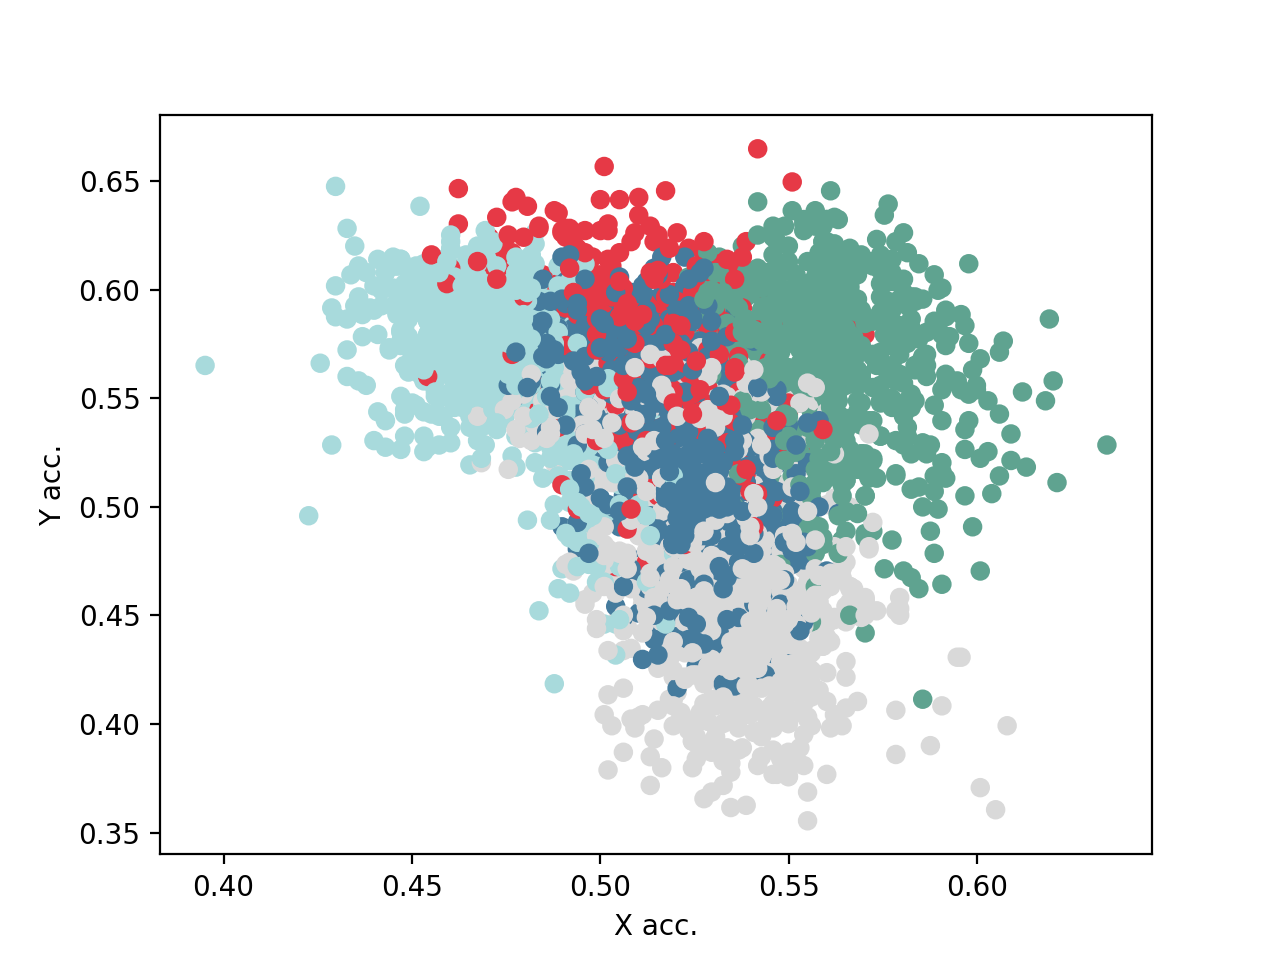

<IPython.core.display.Javascript object>


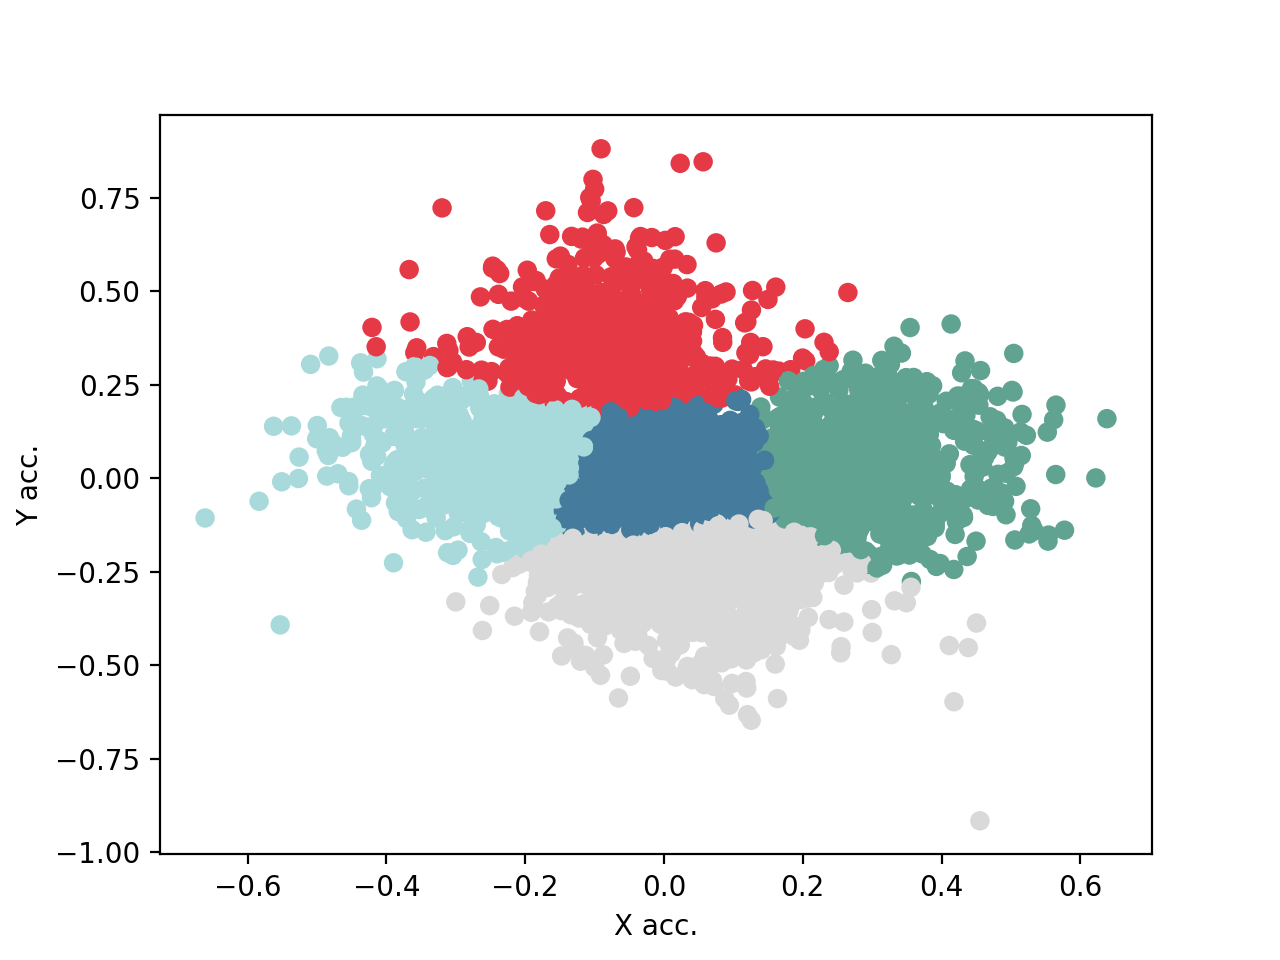

Text(0, 0.5, 'Y acc.')

In [14]:
# Plot data with predicted labels
fig10 = plt.figure(plt_counter)
plt_counter += 1
ax10 = plt.axes()
ax10.scatter(raw_test_data[:, 0], raw_test_data[:, 1], c=cmap(y_test_k_means))
ax10.set_xlabel('X acc.')
ax10.set_ylabel('Y acc.')

# Plot data with predicted labels
fig10 = plt.figure(plt_counter)
plt_counter += 1
ax10 = plt.axes()
ax10.scatter(accel_data[:, 0], accel_data[:, 1], c=cmap(y_test_k_means))
ax10.set_xlabel('X acc.')
ax10.set_ylabel('Y acc.')

In [15]:
percep_preds_test = np.array([predict_perceptron(state, raw_test_data[i, 2:], radius=radius) for i in range(raw_test_data.shape[0])])
softmax_preds_test = softmax_2.predict(raw_test_data[:, 2:]) + 1
combined_preds_test = percep_preds_test * softmax_preds_test

nn_preds_test = np.argmax(model(raw_test_data[:, 2:]), axis=1)


<IPython.core.display.Javascript object>


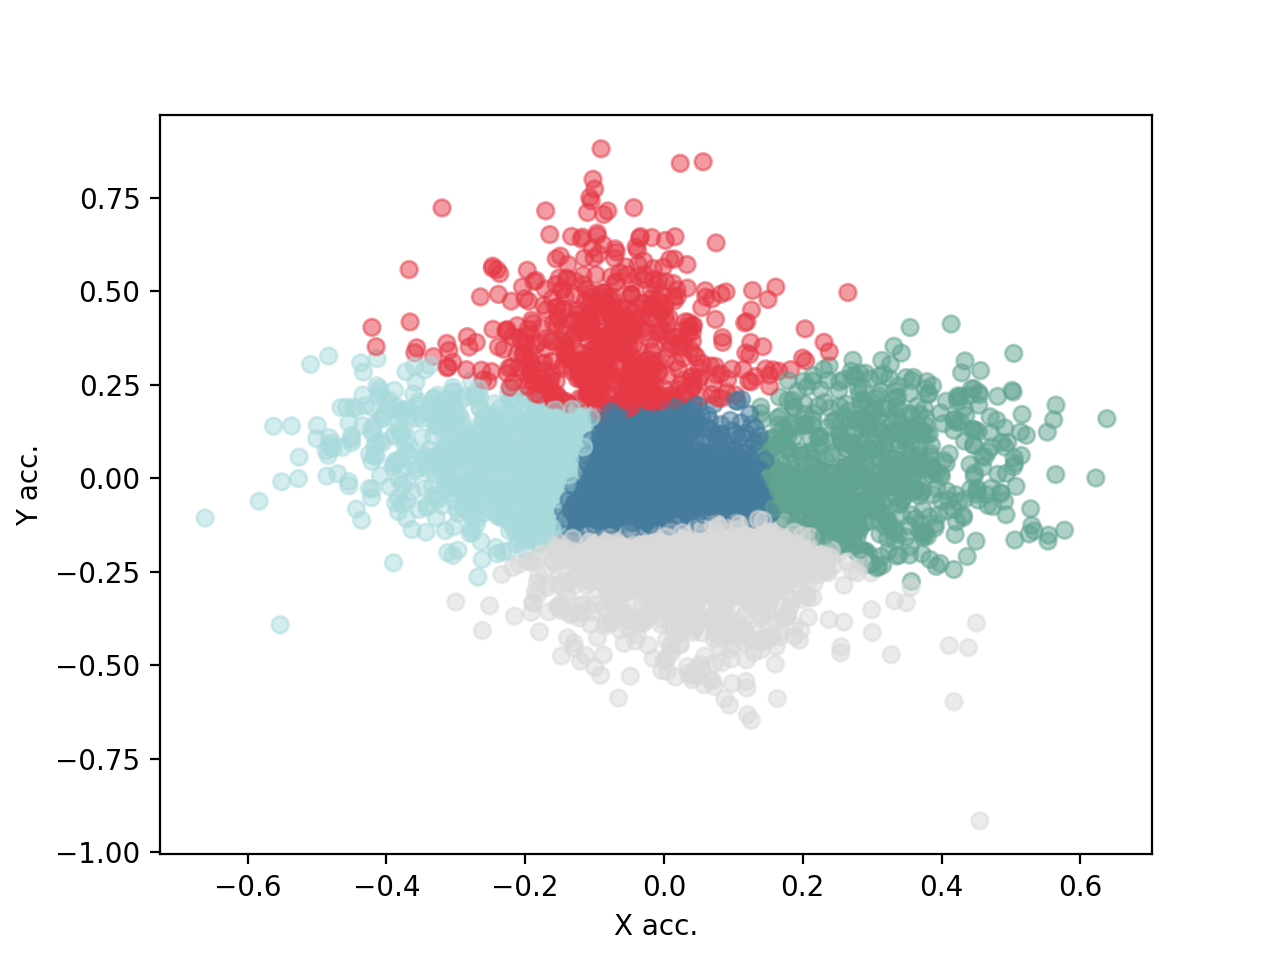

<IPython.core.display.Javascript object>


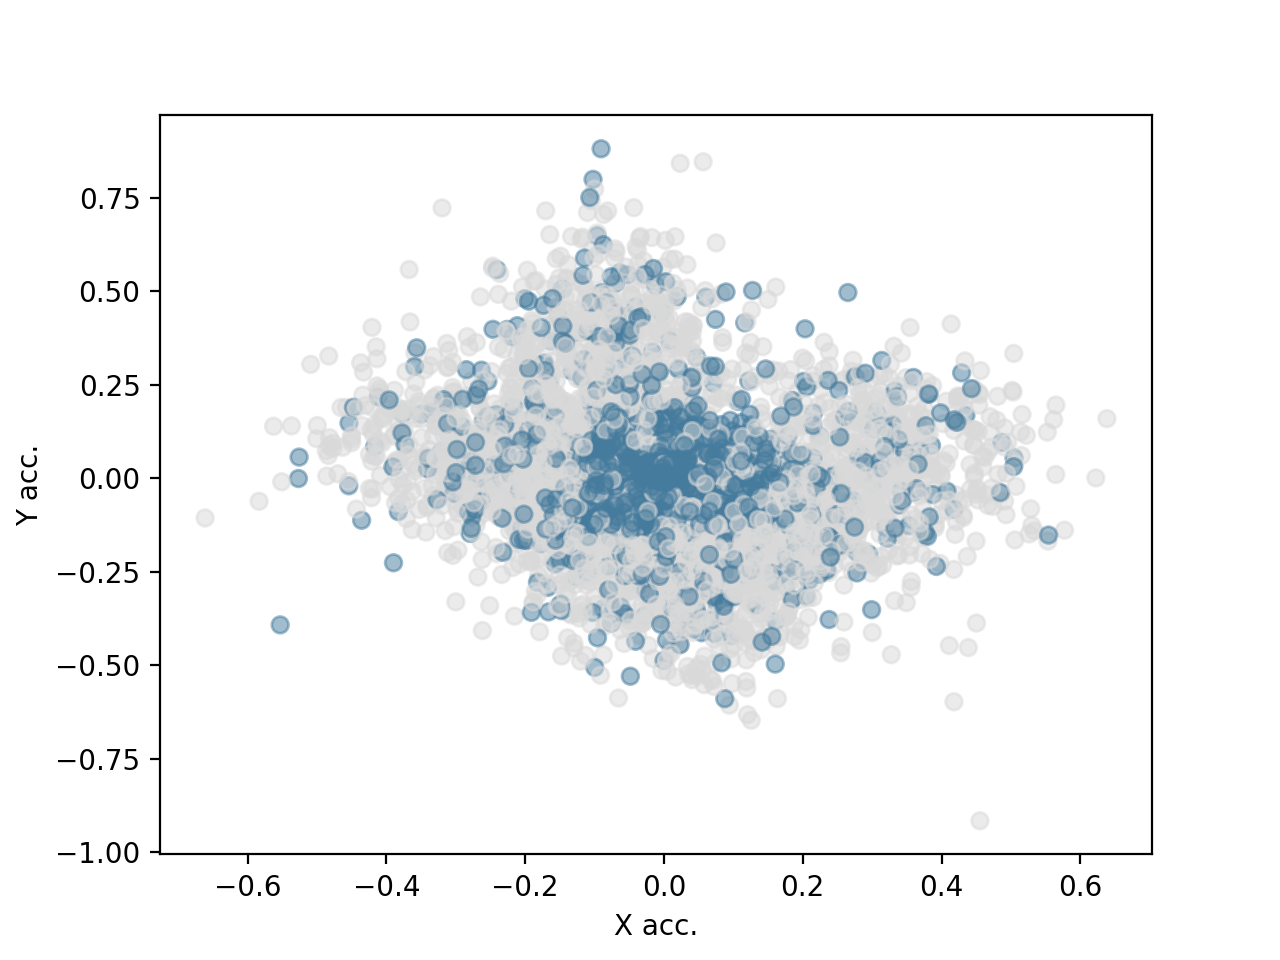

<IPython.core.display.Javascript object>


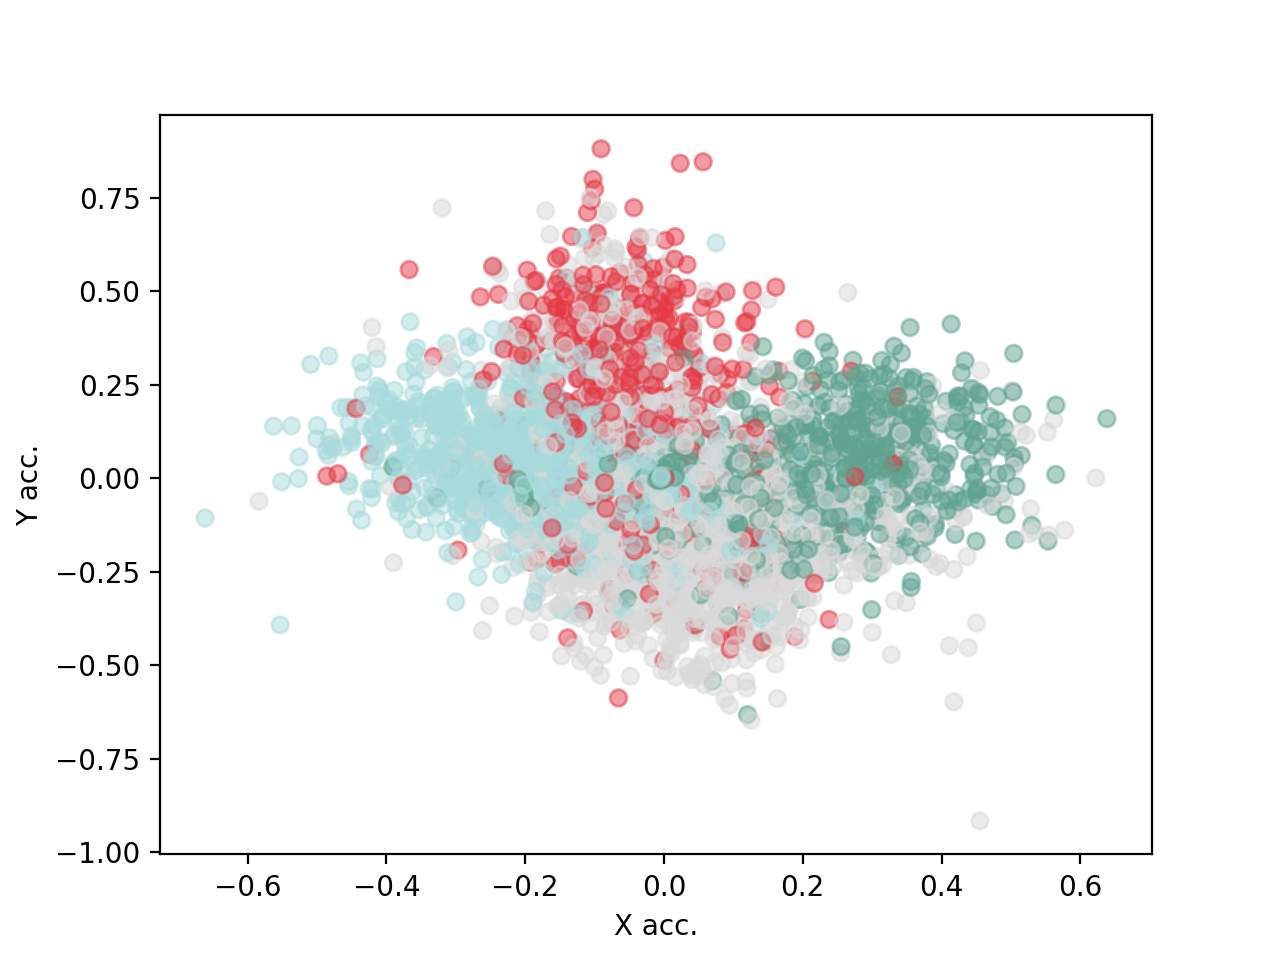

<IPython.core.display.Javascript object>


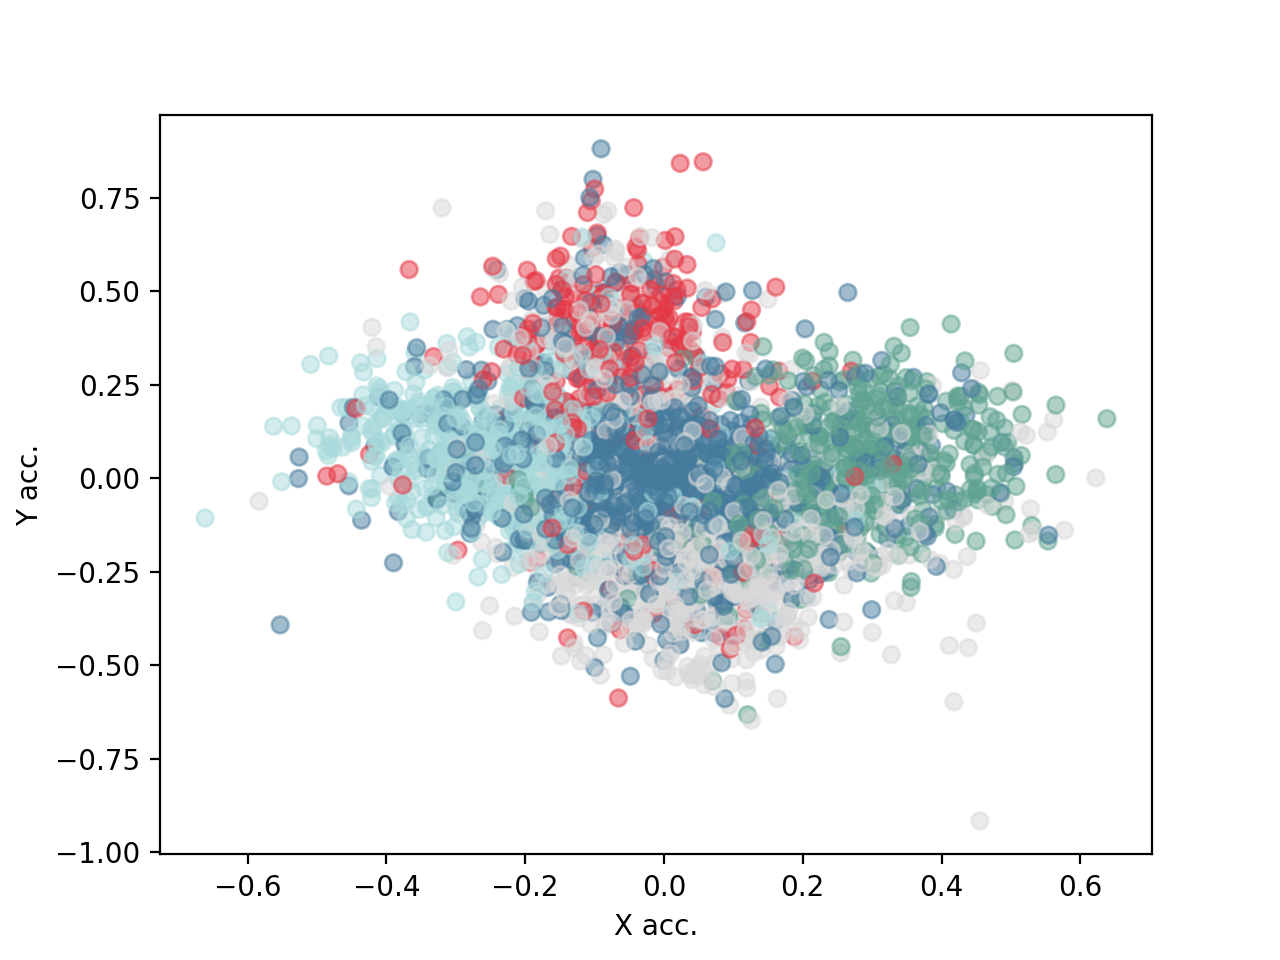

<IPython.core.display.Javascript object>


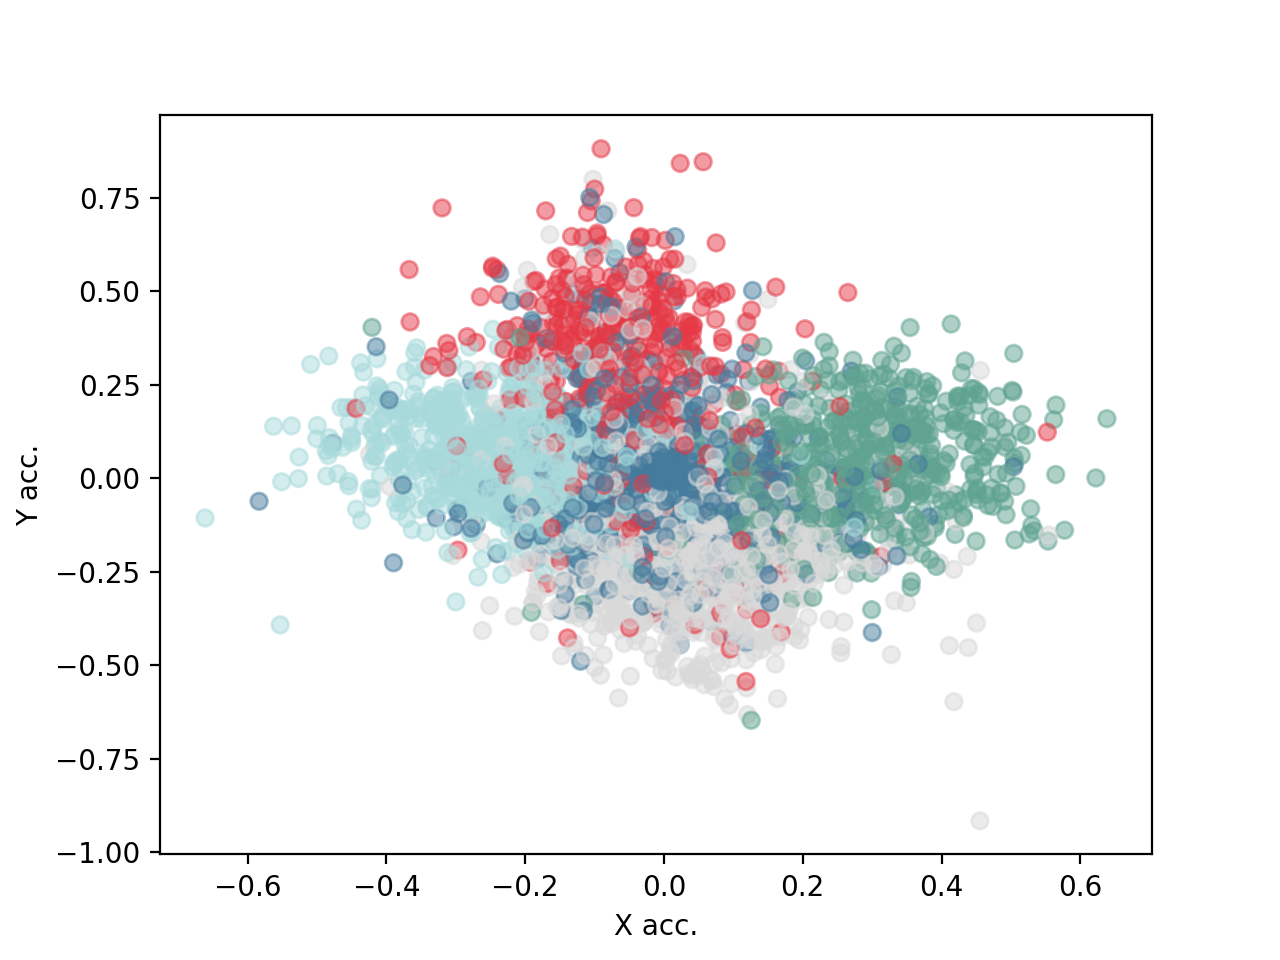

Text(0, 0.5, 'Y acc.')

In [21]:
# Plot data with predicted labels
fig10 = plt.figure(plt_counter)
plt_counter += 1
ax10 = plt.axes()
ax10.scatter(accel_data[:, 0], accel_data[:, 1], c=cmap(y_test_k_means), alpha=0.5)
ax10.set_xlabel('X acc.')
ax10.set_ylabel('Y acc.')

# Plot data with predicted labels
fig11 = plt.figure(plt_counter)
plt_counter += 1
ax11 = plt.axes()
ax11.scatter(accel_data[:, 0], accel_data[:, 1], c=cmap(percep_preds_test), alpha=0.5)
ax11.set_xlabel('X acc.')
ax11.set_ylabel('Y acc.')

# Plot data with predicted labels
fig11 = plt.figure(plt_counter)
plt_counter += 1
ax11 = plt.axes()
ax11.scatter(accel_data[:, 0], accel_data[:, 1], c=cmap(softmax_preds_test), alpha=0.5)
ax11.set_xlabel('X acc.')
ax11.set_ylabel('Y acc.')

# Plot data with predicted labels
fig11 = plt.figure(plt_counter)
plt_counter += 1
ax11 = plt.axes()
ax11.scatter(accel_data[:, 0], accel_data[:, 1], c=cmap(combined_preds_test), alpha=0.5)
ax11.set_xlabel('X acc.')
ax11.set_ylabel('Y acc.')

# Plot data with predicted labels
fig12 = plt.figure(plt_counter)
plt_counter += 1
ax12 = plt.axes()
ax12.scatter(accel_data[:, 0], accel_data[:, 1], c=cmap(nn_preds_test), alpha=0.5)
ax12.set_xlabel('X acc.')
ax12.set_ylabel('Y acc.')

In [17]:
print(np.sum(combined_preds_test == y_test_k_means) / y_test_k_means.size)
print(np.sum(nn_preds_test == y_test_k_means) / y_test_k_means.size)

0.7111666666666666
0.7351666666666666


In [38]:
# Analysis on Perceptron/Softmax
# Determine what percent of the data each class makes up
preds = combined_preds_test
for c in np.unique(y_test_k_means):
    percent_makup = np.sum(y_test_k_means == c) / y_test_k_means.size
    print('Percent makup of total data for class {}: {}'.format(c, percent_makup))
print()
# Determine the accuracy on each individual class
labels_for_incorrect_predictions = np.where(y_test_k_means != preds, y_test_k_means, -1)
labels_for_incorrect_predictions = labels_for_incorrect_predictions[labels_for_incorrect_predictions >= 0]
for c in np.unique(y_test_k_means):
    percent_makup = np.sum(labels_for_incorrect_predictions == c) / labels_for_incorrect_predictions.size
    print('Real class when predicted incorrectly {}: {}'.format(c, percent_makup))
print()
preds_for_incorrect_predictions = np.where(y_test_k_means != preds, preds, -1)
preds_for_incorrect_predictions = preds_for_incorrect_predictions[preds_for_incorrect_predictions >= 0]
for c in np.unique(y_test_k_means):
    percent_makup = np.sum(preds_for_incorrect_predictions == c) / preds_for_incorrect_predictions.size
    print('Prediction when predicted incorrectly {}: {}'.format(c, percent_makup))

Percent makup of total data for class 0: 0.494
Percent makup of total data for class 1: 0.1765
Percent makup of total data for class 2: 0.1235
Percent makup of total data for class 3: 0.1105
Percent makup of total data for class 4: 0.0955

Real class when predicted incorrectly 0: 0.20542412002308136
Real class when predicted incorrectly 1: 0.2590882862088863
Real class when predicted incorrectly 2: 0.15002885170225044
Real class when predicted incorrectly 3: 0.1777264858626659
Real class when predicted incorrectly 4: 0.20773225620311597

Prediction when predicted incorrectly 0: 0.3537218695903058
Prediction when predicted incorrectly 1: 0.3335256780150029
Prediction when predicted incorrectly 2: 0.14079630698211196
Prediction when predicted incorrectly 3: 0.08482400461627236
Prediction when predicted incorrectly 4: 0.08713214079630698


In [39]:
# Analysis on Neural Net
# Determine what percent of the data each class makes up
preds = nn_preds_test
for c in np.unique(y_test_k_means):
    percent_makup = np.sum(y_test_k_means == c) / y_test_k_means.size
    print('Percent makup of total data for class {}: {}'.format(c, percent_makup))
print()
# Determine the accuracy on each individual class
labels_for_incorrect_predictions = np.where(y_test_k_means != preds, y_test_k_means, -1)
labels_for_incorrect_predictions = labels_for_incorrect_predictions[labels_for_incorrect_predictions >= 0]
for c in np.unique(y_test_k_means):
    percent_makup = np.sum(labels_for_incorrect_predictions == c) / labels_for_incorrect_predictions.size
    print('Real class when predicted incorrectly {}: {}'.format(c, percent_makup))
print()
preds_for_incorrect_predictions = np.where(y_test_k_means != preds, preds, -1)
preds_for_incorrect_predictions = preds_for_incorrect_predictions[preds_for_incorrect_predictions >= 0]
for c in np.unique(y_test_k_means):
    percent_makup = np.sum(preds_for_incorrect_predictions == c) / preds_for_incorrect_predictions.size
    print('Prediction when predicted incorrectly {}: {}'.format(c, percent_makup))

Percent makup of total data for class 0: 0.494
Percent makup of total data for class 1: 0.1765
Percent makup of total data for class 2: 0.1235
Percent makup of total data for class 3: 0.1105
Percent makup of total data for class 4: 0.0955

Real class when predicted incorrectly 0: 0.3996224040276904
Real class when predicted incorrectly 1: 0.2183763373190686
Real class when predicted incorrectly 2: 0.10698552548772813
Real class when predicted incorrectly 3: 0.12146003775959723
Real class when predicted incorrectly 4: 0.15355569540591568

Prediction when predicted incorrectly 0: 0.27879169288860917
Prediction when predicted incorrectly 1: 0.31340465701699183
Prediction when predicted incorrectly 2: 0.16677155443675268
Prediction when predicted incorrectly 3: 0.09314033983637508
Prediction when predicted incorrectly 4: 0.14789175582127123
